In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [622]:
df = pd.read_csv('bazaar_task.csv')
df.head()

,app_category,query_category,published_at,rate,comment_count,installed_count,image_count,is_specific,app2query_semantic_similarity,result
0,finance,communication,2015-5-7,4.2,10399,500000.0,4,True,0.456808,1
1,family,family,2017-3-17,4.8,133076,500000.0,4,True,0.758643,1
2,productivity,productivity,2015-10-13,5.2,202818,500000.0,4,True,0.604380,1
3,productivity,productivity,2015-11-22,4.9,8123,12000000.0,8,True,NaN,1
4,finance,communication,2015-5-7,4.2,10399,500000.0,4,True,0.449460,0


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   app_category                   6000 non-null   object 
 1   query_category                 4500 non-null   object 
 2   published_at                   6000 non-null   object 
 3   rate                           4800 non-null   float64
 4   comment_count                  6000 non-null   int64  
 5   installed_count                6000 non-null   float64
 6   image_count                    6000 non-null   int64  
 7   is_specific                    6000 non-null   bool   
 8   app2query_semantic_similarity  5677 non-null   float64
 9   result                         6000 non-null   int64  
dtypes: bool(1), float64(3), int64(3), object(3)
memory usage: 427.9+ KB


NaNs in query category -> replace with "Other"

NaNs in rate -> replace with median/mean

NaNs in semantic_similarity -> replace with median/mean

In [82]:
df.describe()

,rate,comment_count,installed_count,image_count,app2query_semantic_similarity,result
count,4800.000000,6.000000e+03,6.000000e+03,6000.000000,5677.000000,6000.000000
mean,5.374708,1.188606e+05,4.918000e+06,6.477667,0.617935,0.355500
std,0.698683,2.529886e+05,7.901309e+06,3.009598,0.253610,0.478704
min,2.100000,8.240000e+02,5.000000e+05,1.000000,0.000000,0.000000
25%,4.900000,1.039900e+04,5.000000e+05,4.000000,0.445426,0.000000
50%,5.400000,3.435100e+04,2.000000e+06,7.000000,0.625315,0.000000
75%,5.800000,9.318700e+04,5.000000e+06,9.000000,0.833131,1.000000
max,6.600000,1.186132e+06,3.100000e+07,11.000000,1.000000,1.000000


In [83]:
df[df.rate > 5].shape

(3578, 10)

I assume rate is in range 0-10

In [84]:
df.corr()

,rate,comment_count,installed_count,image_count,is_specific,app2query_semantic_similarity,result
rate,1.000000,0.162427,0.202334,0.220201,-0.088311,-0.181035,-0.021296
comment_count,0.162427,1.000000,0.078846,0.101055,0.041164,0.031318,0.020272
installed_count,0.202334,0.078846,1.000000,0.281533,0.194790,-0.260075,0.229122
image_count,0.220201,0.101055,0.281533,1.000000,-0.100772,-0.242696,0.047223
is_specific,-0.088311,0.041164,0.194790,-0.100772,1.000000,0.166187,0.201219
app2query_semantic_similarity,-0.181035,0.031318,-0.260075,-0.242696,0.166187,1.000000,0.149624
result,-0.021296,0.020272,0.229122,0.047223,0.201219,0.149624,1.000000


In [85]:
df_num = df[['rate', 'comment_count', 'installed_count', 'image_count', 'app2query_semantic_similarity', 'result']]
df_cat = df[['app_category', 'query_category', 'is_specific']]

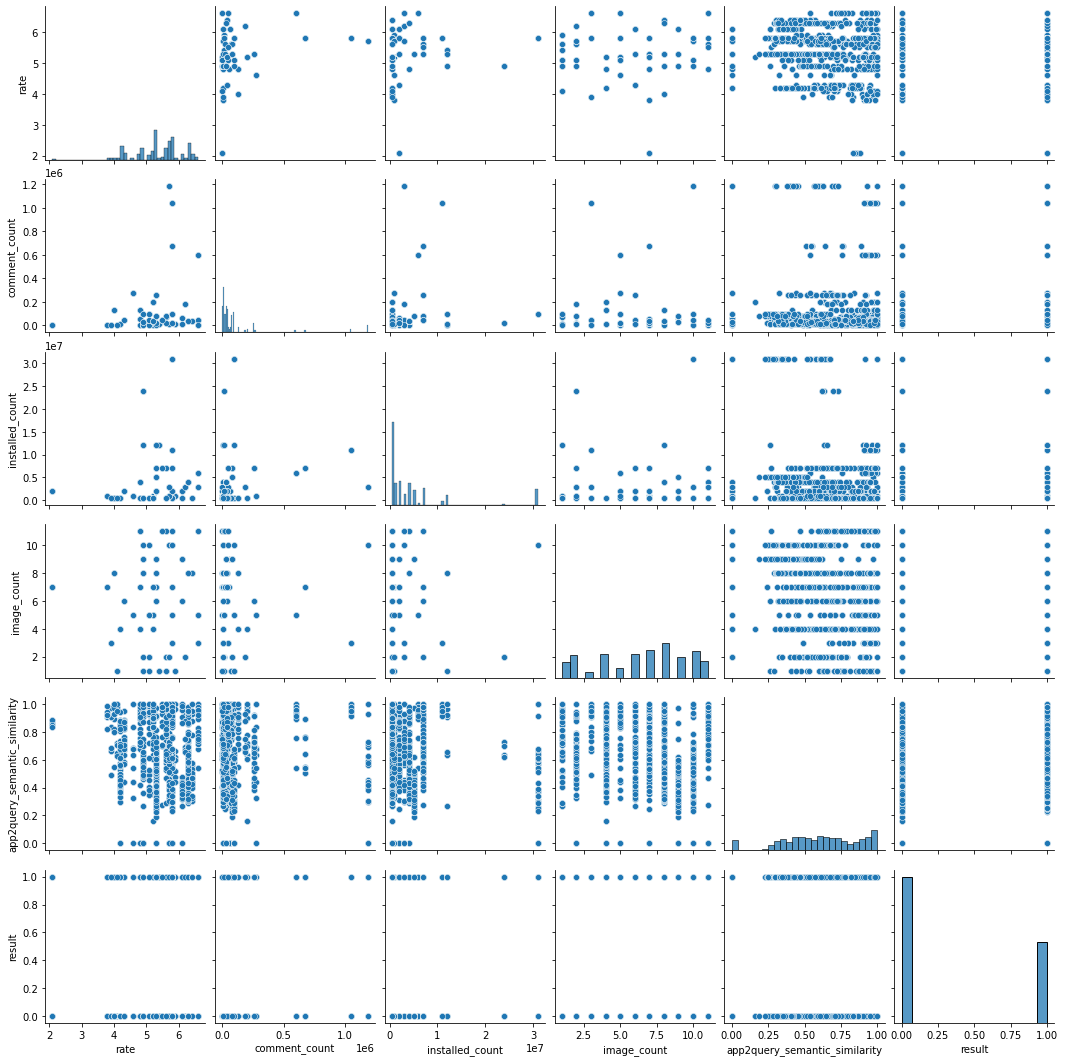

In [86]:
sns.pairplot(df_num, kind='scatter')

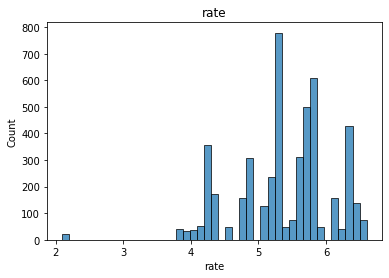

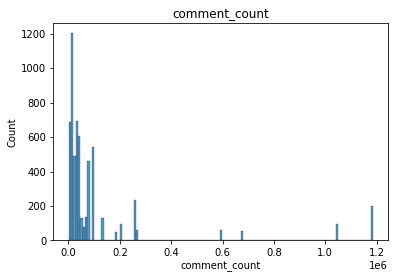

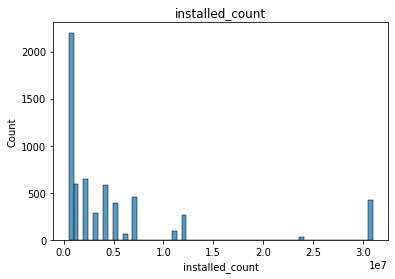

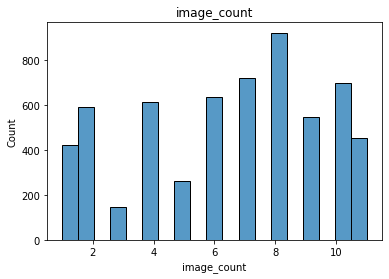

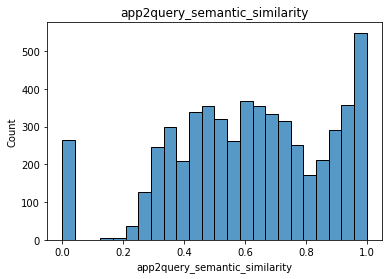

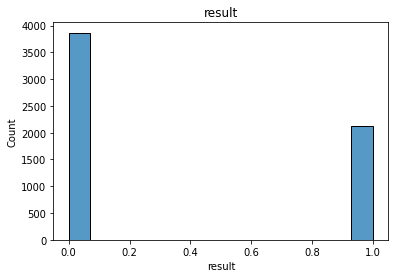

In [87]:
for i in df_num:
    sns.histplot(data=df_num[i]).set_title(i)
    plt.show()

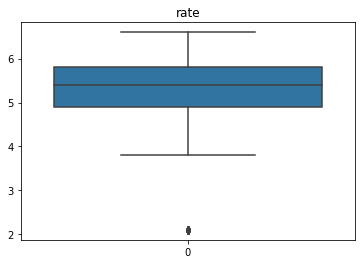

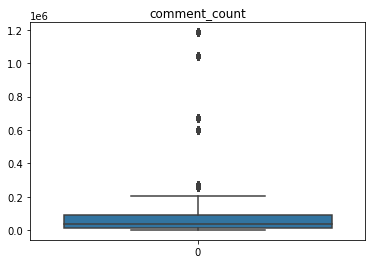

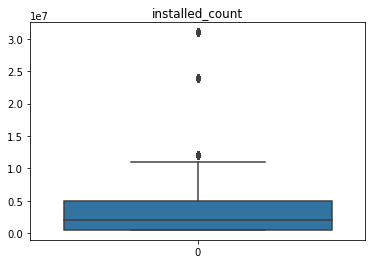

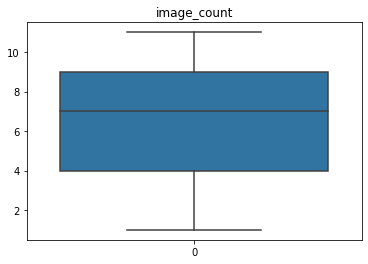

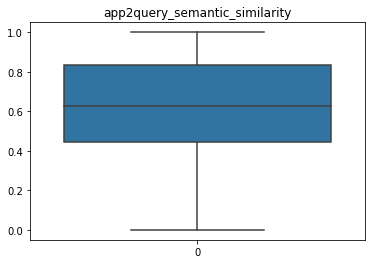

In [446]:
for i in df_num.drop(columns='result'):
    sns.boxplot(data=df_num[i])
    plt.title(i)
    plt.show()

In [626]:
Q1 = df['comment_count'].quantile(0.25)
Q3 = df['comment_count'].quantile(0.75)
IQR = Q3 - Q1
comment_outlier = df.query('comment_count > (@Q3 + 1.5*@IQR)')
print('IQR:%d\nQ1:%d\nQ3:%d' %(IQR, Q1, Q3))
comment_outlier.shape

IQR:82788
Q1:10399
Q3:93187


(700, 10)

In [627]:
Q1 = df['installed_count'].quantile(0.25)
Q3 = df['installed_count'].quantile(0.75)
IQR = Q3 - Q1
install_outlier = df.query('installed_count > (@Q3 + 1.5*@IQR)')
print('IQR:%d\nQ1:%d\nQ3:%d' %(IQR, Q1, Q3))
install_outlier.shape

IQR:4500000
Q1:500000
Q3:5000000


(710, 10)

In [628]:
outliers = pd.concat([comment_outlier, install_outlier]).drop_duplicates()
df = df.drop(outliers.index).reset_index(drop=True)

In [114]:
pd.pivot_table(df, index='result', values=['rate', 'comment_count', 'installed_count', 'image_count', 'app2query_semantic_similarity'], aggfunc='mean')

,app2query_semantic_similarity,comment_count,image_count,installed_count,rate
result,,,,,
0,0.587700,79378.235278,6.327818,2.898486e+06,5.375497
1,0.673668,87401.462249,6.591526,6.137425e+06,5.327362


There's a significant difference for installed_count.

Other features are roughly the same for both 0 and 1 result.

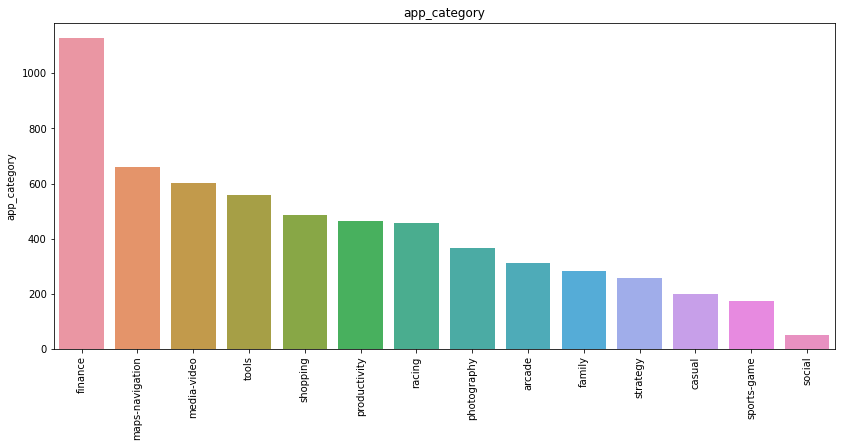

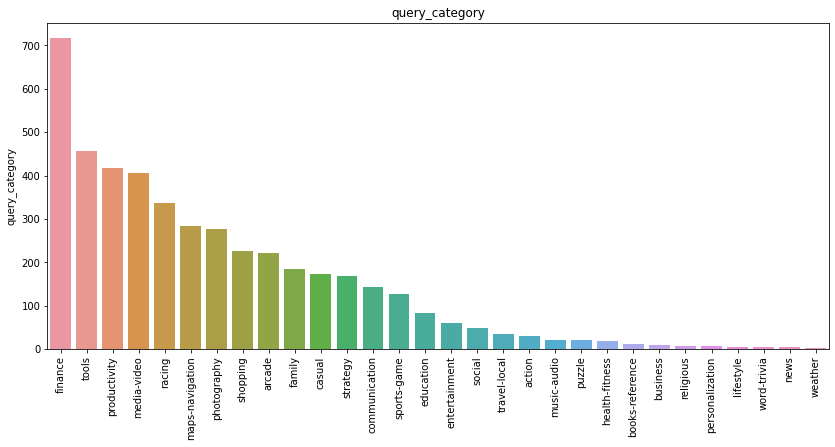

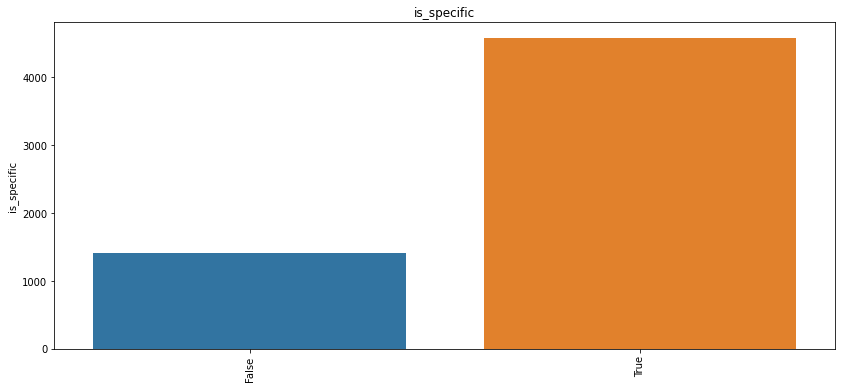

In [115]:
for i in df_cat:
    plt.figure(figsize=(14,6))
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts()).set_title(i)
    plt.xticks(rotation=90)
    plt.show()

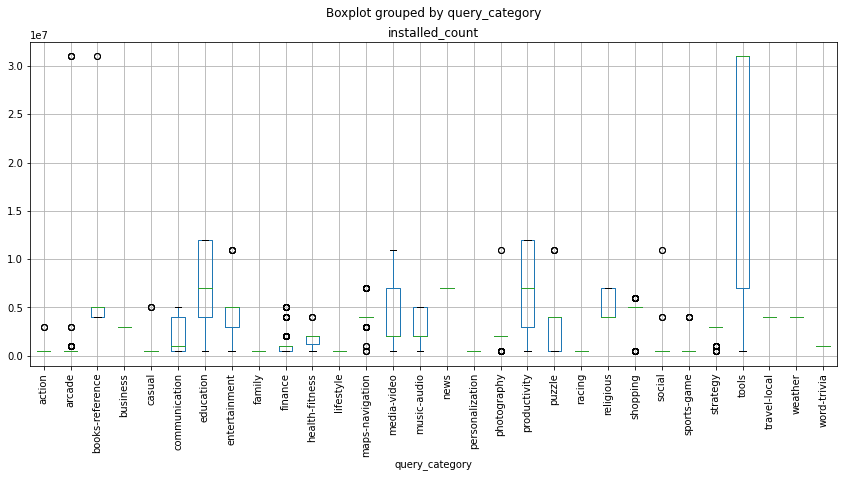

In [116]:
df.boxplot(column='installed_count', by='query_category', figsize=(14,6), rot=90)
plt.show()

Some apps in each categories are considered as outliers, for example, DigiKala in shopping category since it has a high value of installation in relation to other apps.

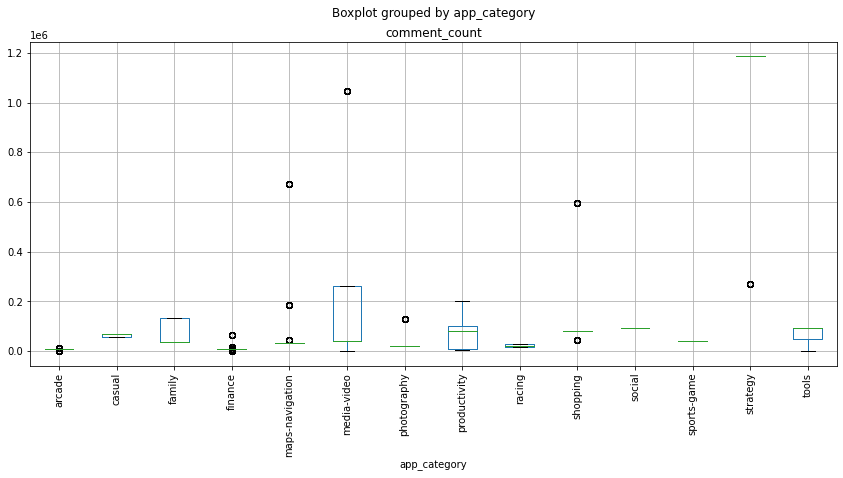

In [117]:
df.boxplot(column='comment_count', by='app_category', figsize=(14,6), rot=90)
plt.show()

In [118]:
pd.pivot_table(df, index='result', columns='is_specific', values='rate', aggfunc='count')

is_specific,False,True
result,,
0,879,1986
1,186,1349


In [629]:
def get_clicks(x):
    return x['result'].sum()/x['result'].shape[0]

specific_clicks = df.groupby('is_specific').apply(lambda x: get_clicks(x))
specific_clicks

is_specific
False    0.177431
True     0.394581
dtype: float64

In [630]:
df['query_category'].fillna(value='Other', inplace=True)
query_clicks = df.groupby('query_category').apply(lambda x: get_clicks(x))
print('mean: ', query_clicks.mean())
print('std: ', query_clicks.std(ddof=0))
query_clicks

mean:  0.27039620373206297
std:  0.16038693582027522


query_category
Other              0.330462
action             0.137931
arcade             0.316514
books-reference    0.111111
business           0.555556
casual             0.360465
communication      0.077465
education          0.314286
entertainment      0.134615
family             0.358696
finance            0.298883
health-fitness     0.157895
lifestyle          0.400000
maps-navigation    0.323308
media-video        0.424920
music-audio        0.095238
news               0.000000
personalization    0.000000
photography        0.286232
productivity       0.448454
puzzle             0.058824
racing             0.235821
religious          0.200000
shopping           0.440191
social             0.543478
sports-game        0.250000
strategy           0.354839
tools              0.569061
travel-local       0.264706
weather            0.333333
word-trivia        0.000000
dtype: float64

classes news and personalization have 0.0 percent of clicks. the result always equals zero in these cases, so I remove them. 

In [631]:
app_clicks = df.groupby('app_category').apply(lambda x: get_clicks(x))
print('mean: ', app_clicks.mean())
print('std: ', app_clicks.std(ddof=0))
app_clicks

mean:  0.3709364319016762
std:  0.14383611331938492


app_category
arcade             0.295820
casual             0.358209
family             0.366197
finance            0.265542
maps-navigation    0.247634
media-video        0.401392
photography        0.293151
productivity       0.537129
racing             0.221491
shopping           0.287912
social             0.647059
sports-game        0.251429
strategy           0.330579
tools              0.689567
dtype: float64

In [632]:
df['published_year'] = df['published_at'].apply(lambda x: x.split('-')[0])
published_year_clicks = df.groupby('published_year').apply(lambda x: get_clicks(x))
print('mean: ', published_year_clicks.mean())
print('std: ', published_year_clicks.std(ddof=0))
published_year_clicks

mean:  0.34797676665407634
std:  0.08095554542070264


published_year
2015    0.394167
2016    0.354286
2017    0.282993
2018    0.207006
2019    0.399408
2020    0.450000
dtype: float64

If std is not close to zero, it means the related data may be useful.

Text(0.5, 1.0, 'published year')

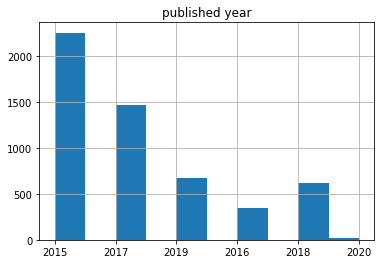

In [701]:
df['published_year'].hist()
plt.title('published year')

In [634]:
df['category_similarity'] = (df['query_category']==df['app_category'])
same_category = df.groupby('category_similarity').apply(lambda x: get_clicks(x))
print(same_category) 

category_similarity
False    0.266853
True     0.389128
dtype: float64


It indicates that the advertisements which has the same category as query has more chance of user's click

In [635]:
def get_rate_cat(x):
    rate_clicks = get_clicks(x)
    return pd.Series(data=[rate_clicks, x.shape[0]])
rate_cat = df.groupby('rate').apply(lambda x: get_rate_cat(x))
rate_cat

,0,1
rate,,
2.1,0.636364,22.0
3.8,0.666667,39.0
3.9,0.437500,32.0
4.0,0.361111,36.0
4.1,0.509804,51.0
4.2,0.163380,355.0
4.3,0.368421,171.0
4.6,0.434783,23.0
4.8,0.544304,158.0


Text(0.5, 1.0, 'comment')

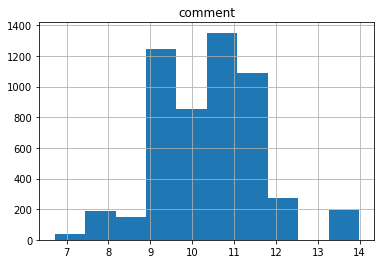

In [702]:
df['comment_norm'] = np.log(df.comment_count+1)
df['comment_norm'].hist()
plt.title('comment') 

# replace this with comment_count

Text(0.5, 1.0, 'install')

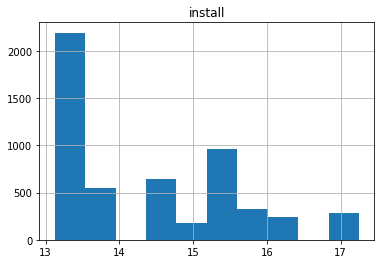

In [703]:
df['installed_norm'] = np.log(df.installed_count+1)
df['installed_norm'].hist()
plt.title('install') 

# discard this

In [638]:
# df = df[(df['query_category']!='weather') & (df['query_category']!='word_trivia') & (df['query_category']!='lifestyle')]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   app_category                   5407 non-null   object 
 1   query_category                 5407 non-null   object 
 2   published_at                   5407 non-null   object 
 3   rate                           4400 non-null   float64
 4   comment_count                  5407 non-null   int64  
 5   installed_count                5407 non-null   float64
 6   image_count                    5407 non-null   int64  
 7   is_specific                    5407 non-null   bool   
 8   app2query_semantic_similarity  5115 non-null   float64
 9   result                         5407 non-null   int64  
 10  published_year                 5407 non-null   object 
 11  category_similarity            5407 non-null   bool   
 12  comment_norm                   5407 non-null   f

In [640]:
# remove categories with values less than 5        
df = df.groupby('query_category').filter(lambda grp: len(grp) > 5)
df['query_category'].value_counts()

Other              1277
finance             716
productivity        388
tools               362
racing              335
media-video         313
photography         276
maps-navigation     266
arcade              218
shopping            209
family              184
casual              172
communication       142
sports-game         128
strategy             93
education            70
entertainment        52
social               46
travel-local         34
action               29
music-audio          21
health-fitness       19
puzzle               17
books-reference       9
business              9
personalization       6
Name: query_category, dtype: int64

In [641]:
df.app_category.value_counts()

finance            1126
maps-navigation     628
racing              456
shopping            455
media-video         427
productivity        404
tools               393
photography         365
arcade              311
family              284
casual              201
sports-game         175
strategy            120
social               46
Name: app_category, dtype: int64

In [642]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='result')
Y = df['result']
train_test = train_test_split(X, Y, test_size=0.2, stratify=X[['app_category', 'query_category']])
for el in train_test:
    el.reset_index(drop=True, inplace=True)
training_data, testing_data, Y_train, Y_test = train_test

In [643]:
print(training_data.shape)
print(testing_data.shape)

(4312, 13)
(1079, 13)


In [644]:
training_data.columns

Index(['app_category', 'query_category', 'published_at', 'rate',
       'comment_count', 'installed_count', 'image_count', 'is_specific',
       'app2query_semantic_similarity', 'published_year',
       'category_similarity', 'comment_norm', 'installed_norm'],
      dtype='object')

In [645]:
# Clean data
pd.options.mode.chained_assignment = None # suppress chain assignment warning

def clean_data(dataframe):
    dataframe.rate.fillna(value=dataframe.rate.median(), inplace=True)
    dataframe.app2query_semantic_similarity.fillna(value=dataframe.app2query_semantic_similarity.median(), inplace=True)
    dataframe.drop(columns=['published_at', 'comment_count', 'installed_norm'], inplace=True)
    return dataframe

training_data = clean_data(training_data)
testing_data = clean_data(testing_data)

training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   app_category                   4312 non-null   object 
 1   query_category                 4312 non-null   object 
 2   rate                           4312 non-null   float64
 3   installed_count                4312 non-null   float64
 4   image_count                    4312 non-null   int64  
 5   is_specific                    4312 non-null   bool   
 6   app2query_semantic_similarity  4312 non-null   float64
 7   published_year                 4312 non-null   object 
 8   category_similarity            4312 non-null   bool   
 9   comment_norm                   4312 non-null   float64
dtypes: bool(2), float64(4), int64(1), object(3)
memory usage: 278.0+ KB


In [646]:
# Scaling

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(training_data[['installed_count', 'comment_norm', 'app2query_semantic_similarity']])
# training_scaled = training_data.copy()
training_data[['installed_count', 'comment_norm', 'app2query_semantic_similarity']] = scaler.transform(training_data[['installed_count', 'comment_norm', 'app2query_semantic_similarity']])

# testing_scaled = testing_data.copy()
testing_data[['installed_count', 'comment_norm', 'app2query_semantic_similarity']] = scaler.transform(testing_data[['installed_count', 'comment_norm', 'app2query_semantic_similarity']])

In [647]:
# One-Hot Encoding

training_data[['rate', 'image_count']] = training_data[['rate', 'image_count']].astype(str)
testing_data[['rate', 'image_count']] = testing_data[['rate', 'image_count']].astype(str)

encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')
encoder.fit(training_data[['app_category', 'query_category', 'rate', 'image_count', 'published_year']])
encoder.categories_
train_enc = pd.DataFrame(encoder.transform(training_data[['app_category', 'query_category', 'rate', 'image_count', 'published_year']]).toarray())
test_enc = pd.DataFrame(encoder.transform(testing_data[['app_category', 'query_category', 'rate', 'image_count', 'published_year']]).toarray())
train_enc.columns = encoder.get_feature_names(['app_cat', 'query_cat', 'rate', 'image', 'year'])
test_enc.columns = encoder.get_feature_names(['app_cat', 'query_cat', 'rate', 'image', 'year'])
X_train = pd.concat([training_data, train_enc], axis=1)
X_test = pd.concat([testing_data, test_enc], axis=1)

# drop category columns
X_train.drop(columns=['app_category', 'query_category', 'rate', 'image_count', 'published_year'], inplace=True)
X_test.drop(columns=['app_category', 'query_category', 'rate', 'image_count', 'published_year'], inplace=True)

In [648]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

In [406]:
# dt = DecisionTreeClassifier(random_state=7).fit(X_train, Y_train)
# kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
# scoring = ['f1', 'accuracy']
# cv = cross_validate(dt, X_train, Y_train, cv=kfold, scoring=scoring)
# print(cv)
# # cv.mean()

# rf = RandomForestClassifier(random_state=7).fit(X_train, Y_train)
# kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
# scoring = ['f1', 'accuracy']
# cv = cross_validate(rf, X_train, Y_train, cv=kfold, scoring=scoring)
# print(cv)

# knn = KNeighborsClassifier().fit(X_train, Y_train)
# kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
# scoring = ['f1', 'accuracy']
# cv = cross_validate(knn, X_train, Y_train, cv=kfold, scoring=scoring)
# print(cv)

# gnb = GaussianNB().fit(X_train, Y_train)
# kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
# scoring = ['f1', 'accuracy']
# cv = cross_validate(gnb, X_train, Y_train, cv=kfold, scoring=scoring)
# cv

# sv = SVC(probability=True).fit(X_train, Y_train)
# kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
# scoring = ['f1', 'accuracy']
# cv = cross_validate(sv, X_train, Y_train, cv=kfold, scoring=scoring)
# cv

In [483]:
# train logistic regression model 

from sklearn.model_selection import StratifiedKFold
def train_model(X_train, Y_train):
    print('training model...')
    lr = LogisticRegression(max_iter=2000).fit(X_train, Y_train)
    kfold = model_selection.StratifiedKFold(n_splits=10, random_state=7, shuffle=True)
    scoring = ['f1', 'accuracy', 'recall', 'precision']
    cv = cross_validate(lr, X_train, Y_train, cv=kfold, scoring=scoring)
    for key in sorted((cv.keys()))[2:]:
        print(key, ': %.3f' %np.average(cv[key]))
    lr = lr.fit(X_train, Y_train)
    return lr

In [484]:
# implement the model on test data

def predict_test(lr, X_test, Y_test):
    print('\npredicting...')
    lr_pred = lr.predict(X_test)
    print('accuracy: %.3f' %metrics.accuracy_score(Y_test, lr_pred))
    print('f1 score: %.3f' %metrics.f1_score(Y_test, lr_pred))
    print('precision: %.3f' %metrics.precision_score(Y_test, lr_pred))
    print('recall: %.3f'% metrics.recall_score(Y_test, lr_pred))

In [649]:
# train data with outliers
lr = train_model(X_train, Y_train)
predict_test(lr, X_test, Y_test)

training model...
test_accuracy : 0.728
test_f1 : 0.504
test_precision : 0.636
test_recall : 0.418

predicting...
accuracy: 0.683
f1 score: 0.469
precision: 0.632
recall: 0.373


In [650]:
# oversampling minority class (result = 1)
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=0.8)
X_oversampled, y_oversampled = sm.fit_resample(X_train, Y_train)
lr_oversample = train_model(X_oversampled, y_oversampled)
predict_test(lr_oversample, X_test, Y_test)
print(Counter(Y_train))
print(Counter(y_oversampled))

# X_train_resampled = X_oversampled
# y_train_resampled = y_oversampled

training model...
test_accuracy : 0.696
test_f1 : 0.643
test_precision : 0.674
test_recall : 0.616

predicting...
accuracy: 0.684
f1 score: 0.573
precision: 0.581
recall: 0.565
Counter({0: 2880, 1: 1432})
Counter({0: 2880, 1: 2304})


In [651]:
# Combining random undersampling with SMOTE oversampling
rs = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = rs.fit_resample(X_oversampled, y_oversampled)
lr_resample = train_model(X_resampled, y_resampled)
predict_test(lr_resample, X_test, Y_test)
print(Counter(y_resampled))

X_train_resampled = X_resampled
y_train_resampled = y_resampled

for c in X_train_resampled[X_train_resampled.columns[5:]]:
    X_train_resampled.loc[:,c] = X_train_resampled.loc[:,c].apply(lambda x: 0.0 if x < 0.5 else 1.0)

training model...
test_accuracy : 0.689
test_f1 : 0.689
test_precision : 0.688
test_recall : 0.690

predicting...
accuracy: 0.682
f1 score: 0.600
precision: 0.569
recall: 0.635
Counter({0: 2304, 1: 2304})


In [652]:
# Combining TomekLinks resampling with SMOTE oversampling 
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')
X_resampled, y_resampled = tl.fit_resample(X_oversampled, y_oversampled)
lr_resample = train_model(X_resampled, y_resampled)
predict_test(lr_resample, X_test, Y_test)
print(Counter(y_resampled))

training model...
test_accuracy : 0.694
test_f1 : 0.647
test_precision : 0.673
test_recall : 0.623

predicting...
accuracy: 0.682
f1 score: 0.576
precision: 0.577
recall: 0.575
Counter({0: 2827, 1: 2304})


In [653]:
# undersampling majority class (result = 0) 
# using different methods

from imblearn.under_sampling import RandomUnderSampler
print('\nRandomUnderSampler')
rs = RandomUnderSampler(random_state=7)
X_undersample, Y_undersample = rs.fit_resample(X_train, Y_train)
lr_undersample = train_model(X_undersample, Y_undersample)
predict_test(lr_undersample, X_test, Y_test)

from imblearn.under_sampling import AllKNN
print('\nAllKNN')
allknn = AllKNN()
X_undersample, Y_undersample = allknn.fit_resample(X_train, Y_train)
lr_undersample = train_model(X_undersample, Y_undersample)
predict_test(lr_undersample, X_test, Y_test)

from imblearn.combine import SMOTEENN
print('\nSMOTEENN')
smote_enn = SMOTEENN(random_state=7)
X_resampled, Y_resampled = smote_enn.fit_resample(X_train, Y_train)
lr_resampled = train_model(X_resampled, Y_resampled)
predict_test(lr_resampled, X_test, Y_test)


RandomUnderSampler
training model...
test_accuracy : 0.679
test_f1 : 0.672
test_precision : 0.688
test_recall : 0.658

predicting...
accuracy: 0.685
f1 score: 0.590
precision: 0.576
recall: 0.605

AllKNN
training model...
test_accuracy : 0.772
test_f1 : 0.768
test_precision : 0.811
test_recall : 0.731

predicting...
accuracy: 0.648
f1 score: 0.618
precision: 0.521
recall: 0.758

SMOTEENN
training model...
test_accuracy : 0.859
test_f1 : 0.847
test_precision : 0.861
test_recall : 0.835

predicting...
accuracy: 0.689
f1 score: 0.625
precision: 0.570
recall: 0.691


In [654]:
# Combining both undersampling and oversampling with random sampler

from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler(random_state=7)
X_oversampled, y_oversampled = rs.fit_resample(X_train, Y_train)
lr_oversampled = train_model(X_oversampled, y_oversampled)
predict_test(lr_oversampled, X_test, Y_test)

from imblearn.under_sampling import RandomUnderSampler
rs = RandomUnderSampler(random_state=7)
X_undersampled, y_undersampled = rs.fit_resample(X_train, Y_train)
lr_undersampled = train_model(X_undersampled, y_undersampled)
predict_test(lr_undersampled, X_test, Y_test)

from collections import Counter

rs = RandomOverSampler(sampling_strategy=0.8)
X_oversampled, y_oversampled = rs.fit_resample(X_train, Y_train)
rs = RandomUnderSampler(sampling_strategy='majority')
X_undersampled, y_undersampled = rs.fit_resample(X_oversampled, y_oversampled)
print(Counter(Y_train))
print(Counter(y_oversampled))
print(Counter(y_undersampled))

lr_resampled = train_model(X_undersampled, y_undersampled)
predict_test(lr_resampled, X_test, Y_test)

training model...
test_accuracy : 0.681
test_f1 : 0.673
test_precision : 0.691
test_recall : 0.656

predicting...
accuracy: 0.677
f1 score: 0.593
precision: 0.562
recall: 0.627
training model...
test_accuracy : 0.679
test_f1 : 0.672
test_precision : 0.688
test_recall : 0.658

predicting...
accuracy: 0.685
f1 score: 0.590
precision: 0.576
recall: 0.605
Counter({0: 2880, 1: 1432})
Counter({0: 2880, 1: 2304})
Counter({0: 2304, 1: 2304})
training model...
test_accuracy : 0.685
test_f1 : 0.681
test_precision : 0.689
test_recall : 0.672

predicting...
accuracy: 0.674
f1 score: 0.596
precision: 0.557
recall: 0.642


Combining random undersampling with SMOTE oversampling performs better.

In [678]:
# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform

model = LogisticRegression(max_iter=2000)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-2, 100)
search = RandomizedSearchCV(model, space, n_iter=500, scoring='f1', n_jobs=-1, cv=cv, random_state=1)
result = search.fit(X_train_resampled, y_train_resampled)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

c:\users\jami\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.68296178        nan 0.68286411        nan 0.69060885 0.6899886
 0.69132011 0.68953409        nan        nan        nan        nan
 0.68296178        nan 0.68300334        nan        nan 0.68286411
 0.68996856        nan 0.68279785 0.69084111 0.68286411 0.69138738
 0.68310145        nan 0.68296178        nan 0.68296178 0.68317642
 0.68996468        nan 0.68296178        nan 0.68296178 0.68235213
        nan 0.68296178 0.69239223        nan 0.68753714 0.68279821
 0.69216354 0.69116597        nan 0.69006288        nan        nan
        nan        nan        nan 0.68296178        nan 0.68286411
        nan 0.68286411        nan        nan        nan        nan
 0.68319934        nan 0.68298639 0.6895127         nan 0.69127218
        nan 0.68274121 0.68296178 0.69747656        nan        nan
        nan        nan 0.6

Best Score: 0.6980746497283461
Best Hyperparameters: {'C': 0.031810135902686304, 'penalty': 'l1', 'solver': 'liblinear'}


In [679]:
lr = LogisticRegression(max_iter=2000, penalty='l1', solver='liblinear', C=0.031810135902686304)
lr = lr.fit(X_train_resampled, y_train_resampled)
predict_test(lr, X_test, Y_test)


predicting...
accuracy: 0.669
f1 score: 0.612
precision: 0.547
recall: 0.694


Best Threshold=0.351100, F-Score=0.634


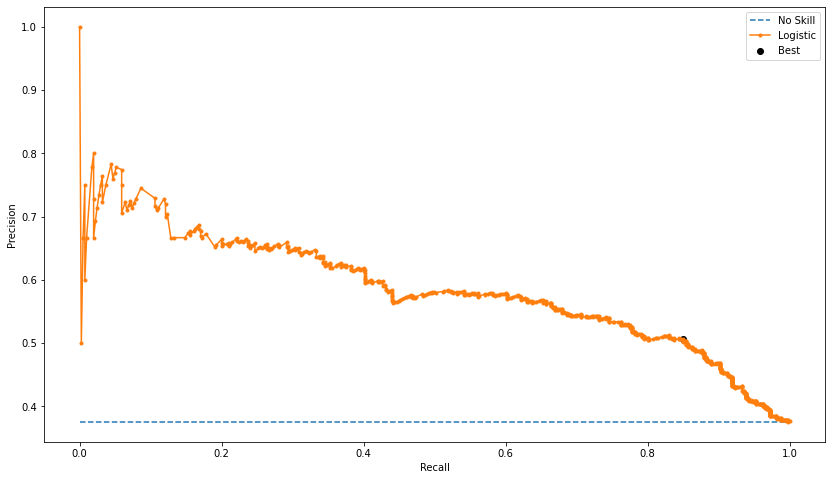

In [769]:
# Optimal Threshold for Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=2000)
model.fit(X_train_resampled, y_train_resampled)
# predict probabilities
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
precision, recall, thresholds = precision_recall_curve(Y_test, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
plt.figure(figsize=(14,8))
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

Feature: installed_count, Score: 0.26109
Feature: is_specific, Score: 1.01850
Feature: app2query_semantic_similarity, Score: 0.37608
Feature: category_similarity, Score: 0.67687
Feature: comment_norm, Score: -0.12084
Feature: app_cat_arcade, Score: -0.83413
Feature: app_cat_casual, Score: -0.29471
Feature: app_cat_family, Score: 0.00000
Feature: app_cat_finance, Score: -0.65388
Feature: app_cat_maps-navigation, Score: 0.05297
Feature: app_cat_media-video, Score: -0.02125
Feature: app_cat_photography, Score: 0.17146
Feature: app_cat_productivity, Score: 0.15985
Feature: app_cat_racing, Score: -0.80691
Feature: app_cat_shopping, Score: -1.27048
Feature: app_cat_social, Score: 0.00000
Feature: app_cat_sports-game, Score: -0.79124
Feature: app_cat_strategy, Score: 0.00311
Feature: app_cat_tools, Score: 0.00000
Feature: query_cat_Other, Score: 0.29297
Feature: query_cat_action, Score: 0.00000
Feature: query_cat_arcade, Score: -0.21227
Feature: query_cat_books-reference, Score: 0.00000
Featu

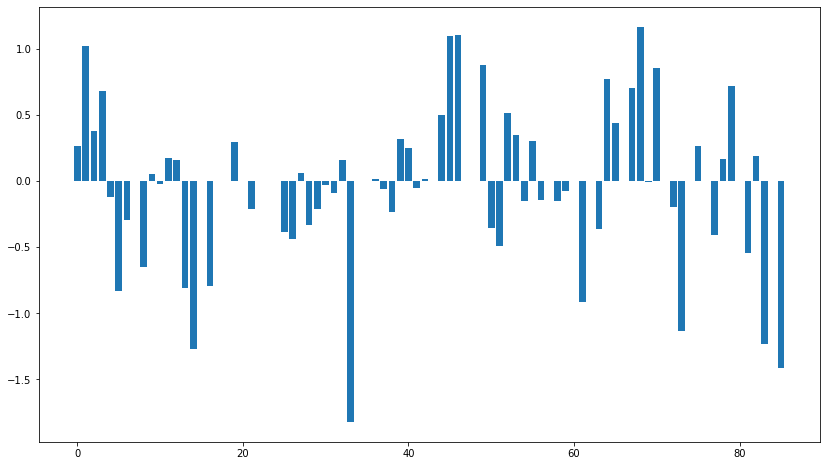

In [770]:
# Performing feature importance

# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X_train_resampled.columns[i],v))
# plot feature importance
plt.figure(figsize=(14,8))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

When model is trained with C = 0.031810135902686304, lots of features get an importance of zero! -> further research

<AxesSubplot:>

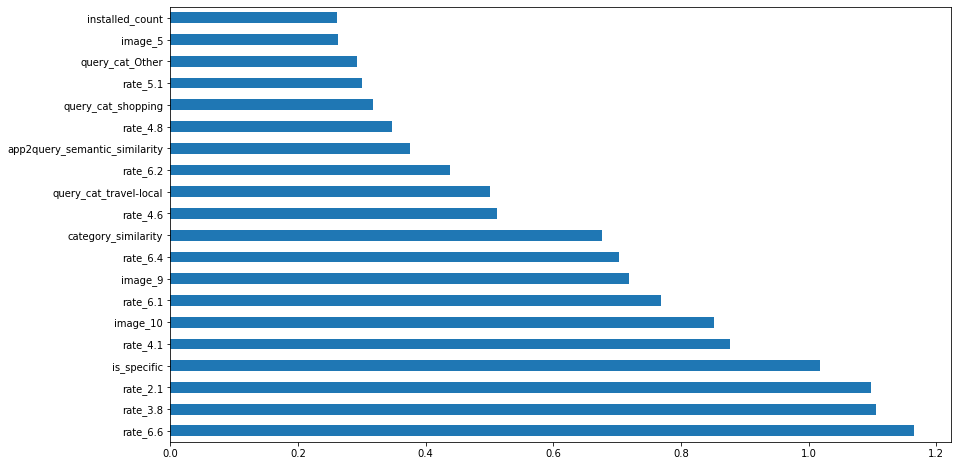

In [771]:
pd.Series(importance, index=X_train_resampled.columns).nlargest(20).plot(kind='barh', figsize=(14,8))

In [746]:
threshold = 0.351122
y_pred = model.predict_proba(X_test)
y_pred

array([[0.61566762, 0.38433238],
       [0.25616855, 0.74383145],
       [0.27579862, 0.72420138],
       ...,
       [0.90251488, 0.09748512],
       [0.76414197, 0.23585803],
       [0.1805259 , 0.8194741 ]])

In [747]:
y = pd.Series(np.argmax(y_pred, axis=1))

In [748]:
y

0       0
1       1
2       1
3       0
4       0
       ..
1074    0
1075    1
1076    0
1077    0
1078    1
Length: 1079, dtype: int64

In [749]:
idx = (Y_test != y)
wrong_pred = X_test[idx]

In [750]:
wrong_pred

,installed_count,is_specific,app2query_semantic_similarity,category_similarity,comment_norm,app_cat_arcade,app_cat_casual,app_cat_family,app_cat_finance,app_cat_maps-navigation,...,image_6,image_7,image_8,image_9,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
8,3.925799,True,1.561358,False,0.860570,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,-0.508386,True,0.832412,False,-0.348561,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13,0.000455,True,-0.481815,False,0.073447,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21,-0.290311,True,-0.575924,True,-0.369216,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24,-0.508386,False,1.561358,True,0.457612,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,-0.508386,True,0.668098,True,1.473964,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1068,-0.435694,False,-0.392731,True,-0.665840,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1069,-0.290311,False,-0.612965,True,-0.369216,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1074,-0.508386,False,-1.176402,False,-1.065333,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [751]:
wrong_pred = pd.DataFrame(encoder.inverse_transform(wrong_pred[wrong_pred.columns[5:]]), columns=['app_category', 'query_category', 'rate', 'image_count', 'published_year'])
false_pred = pd.concat([X_test[idx][X_test[idx].columns[0:5]].reset_index(drop=True), wrong_pred.reset_index(drop=True)], axis=1)
false_pred = pd.concat([false_pred, Y_test[idx].reset_index(drop=True)], axis=1)

In [752]:
false_pred

,installed_count,is_specific,app2query_semantic_similarity,category_similarity,comment_norm,app_category,query_category,rate,image_count,published_year,result
0,3.925799,True,1.561358,False,0.860570,tools,Other,5.8,10,2015,0
1,-0.508386,True,0.832412,False,-0.348561,racing,Other,5.6,11,2019,1
2,0.000455,True,-0.481815,False,0.073447,maps-navigation,travel-local,6.3,8,2018,1
3,-0.290311,True,-0.575924,True,-0.369216,photography,photography,5.3,7,2017,0
4,-0.508386,False,1.561358,True,0.457612,casual,casual,5.4,7,2019,1
...,...,...,...,...,...,...,...,...,...,...,...
339,-0.508386,True,0.668098,True,1.473964,productivity,productivity,5.2,4,2015,0
340,-0.435694,False,-0.392731,True,-0.665840,arcade,arcade,5.9,1,2017,1
341,-0.290311,False,-0.612965,True,-0.369216,photography,photography,5.3,7,2017,1
342,-0.508386,False,-1.176402,False,-1.065333,arcade,Other,6.1,6,2019,1


In [753]:
false_pred.groupby('category_similarity').apply(lambda x: get_clicks(x))

category_similarity
False    0.684211
True     0.297189
dtype: float64

In [754]:
false_pred.category_similarity.value_counts()

True     249
False     95
Name: category_similarity, dtype: int64

In [755]:
false_pred.groupby('is_specific').apply(lambda x: get_clicks(x))

is_specific
False    0.961538
True     0.304795
dtype: float64

In [756]:
false_pred.is_specific.value_counts()

True     292
False     52
Name: is_specific, dtype: int64

In [757]:
false_pred.groupby('published_year').apply(lambda x: get_clicks(x))

published_year
2015    0.170370
2016    0.457143
2017    0.573034
2018    0.906250
2019    0.352941
2020    1.000000
dtype: float64

In [758]:
false_pred.groupby('rate').apply(lambda x: get_clicks(x))
# some rates have a larger number of instances and that makes their impact more on the model

rate
2.1    0.000000
3.8    0.000000
3.9    0.000000
4.0    0.142857
4.1    0.250000
4.2    1.000000
4.3    0.052632
4.6    0.000000
4.8    0.000000
4.9    0.526316
5.1    0.125000
5.2    0.318182
5.3    0.421053
5.4    0.402439
5.5    0.000000
5.6    0.500000
5.7    0.800000
5.8    0.120000
5.9    1.000000
6.1    0.555556
6.2    0.000000
6.3    0.863636
6.4    0.571429
6.6    0.000000
dtype: float64

In [759]:
false_pred.groupby('image_count').apply(lambda x: get_clicks(x))

image_count
1     0.466667
10    0.100000
11    0.448276
2     0.527778
3     0.000000
4     0.533333
5     0.000000
6     0.071429
7     0.426230
8     0.666667
9     0.576923
dtype: float64